In [7]:
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [2]:
bday = pd.read_csv('nfl_birthdays.csv', index_col=0)
bday = bday.reset_index(drop=False)
bday.head()

,index,rank_row,player,position,born,first_year,last_year,ap1,pb,st,...,sk_yds,run_att,run_yds,run_td,run_long,rec_rec,rec_yds,rec_td,rec_lng,month
0,0,1,Grady Allen,LB,1946,1968,1972,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,2,Ralph Anderson,E,1937,1958,1960,0,0,2,...,NaN,NaN,NaN,NaN,NaN,55.0,791.0,6.0,46.0,1
2,2,3,Teddy Andrulewicz,WB,1905,1930,1930,0,0,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1
3,3,4,Justin Armour,WR,1973,1995,1999,0,0,1,...,0.0,4.0,-5.0,0.0,6.0,64.0,861.0,7.0,54.0,1
4,4,5,Marvin Austin,DL,1989,2012,2014,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


Hypothesis
* Ho: mu(Q1 bdays) - mu(Q2-Q4 bday) = 0
* Ha: mu(Q1 bdays) - mu(Q2-Q4 bday) != 0

In [17]:
q1_bday = bday[(bday.month <= 4) & (bday.born >= 1980)].month
rest_bday = bday[(bday.month > 4) & (bday.born >= 1980)].month

In [18]:
x = np.random.choice(bday.month, size=1000 , replace=False)
y = np.random.choice(bday.month, size=1000 , replace=False)

Difference in Mean

In [20]:
diff_mean = q1_bday.mean() - rest_bday.mean()
diff_mean

-6.052595070364846

The difference in mean fo

In [44]:
# number of permutations required for the permutaiton test
nperm = 1000

# create list ot hold average mean values during permutation test
perm_result = []

for i in range(0,nperm):
    q1_sample = np.random.choice(bday.month, size=100 , replace=False)     # randomly assign Q1 birthdays to sample group
    rest_sample = np.random.choice(bday.month, size=100 , replace=False)   # randomly assign Q2-Q4 birthdayssample group
    sample_diff = q1_sample.mean() - rest_sample.mean()                    # compute difference in sample menas
    perm_result.append(sample_diff)
    
print("Number of values greater than the observed mean difference: ", len([i for i in perm_result if i > diff_mean]))

Number of values greater than the observed mean difference:  1000


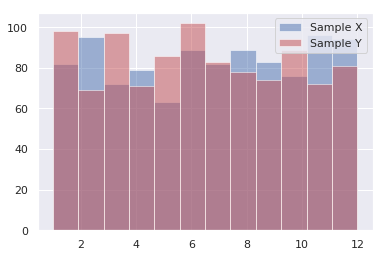

In [14]:
plt.hist(x, bins=12, alpha=0.5, color='b')
plt.hist(y, bins=12,alpha=0.5, color='r')
leg = ['Sample X', 'Sample Y']
plt.legend(leg)
plt.show()